# Clustering Analysis

### Author: Bruno Chereque

#### Frontier Economics: Interview task

In [1]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the required packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import ks_2samp

In [2]:
# Load the final dataset
 
final_dataset = pd.read_csv(r'C:\Bruno\Postulaciones\Postulaciones GE\Frontier Economics\Junior Data Scientist\Data\final_dataset.csv')

final_dataset.head()

C:\Users\bruno\AppData\Local\Temp\ipykernel_21012\1551733010.py:3: DtypeWarning: Columns (20,21,22,106,107,108,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  final_dataset = pd.read_csv(r'C:\Bruno\Postulaciones\Postulaciones GE\Frontier Economics\Junior Data Scientist\Data\final_dataset.csv')


,Local authority code,Local authority name,LSOA code,LSOA name,year,mean_price,geography_council_tax,ba_code_council_tax,area_name_council_tax,band_a_council_tax,...,avg_lower_age_school_lsoa,avg_upper_age_school_lsoa,range_age_school_lsoa,num_mixed_gender_school_lsoa,num_girls_only_school_lsoa,num_boys_only_school_lsoa,num_religious_schools_school_lsoa,num_maintained_schools_school_lsoa,num_independent_schools_school_lsoa,merge_5
0,E06000001,Hartlepool,E01011949,Hartlepool 009A,2014,70000.0,LSOA,NaN,Hartlepool 009A,680.0,...,9.5,55.0,45.5,2.0,0.0,0.0,2.0,1.0,0.0,3
1,E06000001,Hartlepool,E01011949,Hartlepool 009A,2015,71875.0,LSOA,NaN,Hartlepool 009A,680.0,...,9.5,55.0,45.5,2.0,0.0,0.0,2.0,1.0,0.0,3
2,E06000001,Hartlepool,E01011949,Hartlepool 009A,2016,82250.0,LSOA,NaN,Hartlepool 009A,680.0,...,9.5,55.0,45.5,2.0,0.0,0.0,2.0,1.0,0.0,3
3,E06000001,Hartlepool,E01011949,Hartlepool 009A,2017,89612.5,LSOA,NaN,Hartlepool 009A,680.0,...,2.0,11.0,9.0,1.0,0.0,0.0,1.0,1.0,0.0,3
4,E06000001,Hartlepool,E01011949,Hartlepool 009A,2018,82000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [3]:
# Print all columns and their data types explicitly
for col in final_dataset.columns:
    print(f"{col}: {final_dataset[col].dtype}")

Local authority code: object
Local authority name: object
LSOA code: object
LSOA name: object
year: int64
mean_price: float64
geography_council_tax: object
ba_code_council_tax: float64
area_name_council_tax: object
band_a_council_tax: float64
band_b_council_tax: float64
band_c_council_tax: float64
band_d_council_tax: float64
band_e_council_tax: float64
band_f_council_tax: float64
band_g_council_tax: float64
band_h_council_tax: float64
band_i_council_tax: object
all_properties_council_tax: float64
merge_1: int64
Region_tt_emp_centres: object
LA_Code_tt_emp_centres: object
LA_Name_tt_emp_centres: object
Empl_pop_tt_emp_centres: float64
100EmpPTt_tt_emp_centres: float64
100EmpPT15n_tt_emp_centres: float64
100EmpPT30n_tt_emp_centres: float64
100EmpPT45n_tt_emp_centres: float64
100EmpPT60n_tt_emp_centres: float64
100EmpPT15pct_tt_emp_centres: float64
100EmpPT30pct_tt_emp_centres: float64
100EmpPT45pct_tt_emp_centres: float64
100EmpPT60pct_tt_emp_centres: float64
100EmpCyct_tt_emp_centres: f

In [4]:
# Filter for years between 2014 and 2017

filtered_dataset = final_dataset[(final_dataset['year'] >= 2014) & (final_dataset['year'] <= 2017)]
filtered_dataset.head()

,Local authority code,Local authority name,LSOA code,LSOA name,year,mean_price,geography_council_tax,ba_code_council_tax,area_name_council_tax,band_a_council_tax,...,avg_lower_age_school_lsoa,avg_upper_age_school_lsoa,range_age_school_lsoa,num_mixed_gender_school_lsoa,num_girls_only_school_lsoa,num_boys_only_school_lsoa,num_religious_schools_school_lsoa,num_maintained_schools_school_lsoa,num_independent_schools_school_lsoa,merge_5
0,E06000001,Hartlepool,E01011949,Hartlepool 009A,2014,70000.0,LSOA,NaN,Hartlepool 009A,680.0,...,9.5,55.0,45.5,2.0,0.0,0.0,2.0,1.0,0.0,3
1,E06000001,Hartlepool,E01011949,Hartlepool 009A,2015,71875.0,LSOA,NaN,Hartlepool 009A,680.0,...,9.5,55.0,45.5,2.0,0.0,0.0,2.0,1.0,0.0,3
2,E06000001,Hartlepool,E01011949,Hartlepool 009A,2016,82250.0,LSOA,NaN,Hartlepool 009A,680.0,...,9.5,55.0,45.5,2.0,0.0,0.0,2.0,1.0,0.0,3
3,E06000001,Hartlepool,E01011949,Hartlepool 009A,2017,89612.5,LSOA,NaN,Hartlepool 009A,680.0,...,2.0,11.0,9.0,1.0,0.0,0.0,1.0,1.0,0.0,3
10,E06000001,Hartlepool,E01011950,Hartlepool 008A,2014,32125.0,LSOA,NaN,Hartlepool 008A,710.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [6]:
# Filter the dataset to keep only numeric columns (float64 or int64) for the clustering analysis
numeric_dataset = filtered_dataset.select_dtypes(include=['float64', 'int64'])
numeric_dataset.head()

,year,mean_price,ba_code_council_tax,band_a_council_tax,band_b_council_tax,band_c_council_tax,band_d_council_tax,band_e_council_tax,band_f_council_tax,band_g_council_tax,...,avg_lower_age_school_lsoa,avg_upper_age_school_lsoa,range_age_school_lsoa,num_mixed_gender_school_lsoa,num_girls_only_school_lsoa,num_boys_only_school_lsoa,num_religious_schools_school_lsoa,num_maintained_schools_school_lsoa,num_independent_schools_school_lsoa,merge_5
0,2014,70000.0,NaN,680.0,50.0,30.0,10.0,0.0,NaN,0.0,...,9.5,55.0,45.5,2.0,0.0,0.0,2.0,1.0,0.0,3
1,2015,71875.0,NaN,680.0,50.0,30.0,10.0,0.0,NaN,0.0,...,9.5,55.0,45.5,2.0,0.0,0.0,2.0,1.0,0.0,3
2,2016,82250.0,NaN,680.0,50.0,30.0,10.0,0.0,NaN,0.0,...,9.5,55.0,45.5,2.0,0.0,0.0,2.0,1.0,0.0,3
3,2017,89612.5,NaN,680.0,60.0,30.0,10.0,0.0,NaN,0.0,...,2.0,11.0,9.0,1.0,0.0,0.0,1.0,1.0,0.0,3
10,2014,32125.0,NaN,710.0,70.0,10.0,10.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [7]:
# List of columns to drop (non relevant)
columns_to_drop = [
    "year", 
    "ba_code_council_tax", 
    "merge_1", 
    "merge_2", 
    "merge_3", 
    "merge_4", 
    "merge_5"
]

# Drop the specified columns
cluster_dataset = numeric_dataset.drop(columns=columns_to_drop, errors="ignore")

# Check the updated dataset
cluster_dataset.head()


,mean_price,band_a_council_tax,band_b_council_tax,band_c_council_tax,band_d_council_tax,band_e_council_tax,band_f_council_tax,band_g_council_tax,band_h_council_tax,all_properties_council_tax,...,num_post16_schools_school_lsoa,avg_lower_age_school_lsoa,avg_upper_age_school_lsoa,range_age_school_lsoa,num_mixed_gender_school_lsoa,num_girls_only_school_lsoa,num_boys_only_school_lsoa,num_religious_schools_school_lsoa,num_maintained_schools_school_lsoa,num_independent_schools_school_lsoa
0,70000.0,680.0,50.0,30.0,10.0,0.0,NaN,0.0,0.0,770.0,...,1.0,9.5,55.0,45.5,2.0,0.0,0.0,2.0,1.0,0.0
1,71875.0,680.0,50.0,30.0,10.0,0.0,NaN,0.0,0.0,770.0,...,1.0,9.5,55.0,45.5,2.0,0.0,0.0,2.0,1.0,0.0
2,82250.0,680.0,50.0,30.0,10.0,0.0,NaN,0.0,0.0,770.0,...,1.0,9.5,55.0,45.5,2.0,0.0,0.0,2.0,1.0,0.0
3,89612.5,680.0,60.0,30.0,10.0,0.0,NaN,0.0,0.0,770.0,...,0.0,2.0,11.0,9.0,1.0,0.0,0.0,1.0,1.0,0.0
10,32125.0,710.0,70.0,10.0,10.0,NaN,NaN,0.0,0.0,810.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Calculate the number of missing values per column
missing_counts = cluster_dataset.isnull().sum()

# Calculate the percentage of missing values relative to the total number of rows
missing_percentage = (missing_counts / len(cluster_dataset)) * 100

# Combine both into a DataFrame for easy viewing
missing_summary = pd.DataFrame({
    "Missing Values": missing_counts,
    "Percentage (%)": missing_percentage
}).sort_values(by="Missing Values", ascending=False)

# Display the summary
missing_summary

# 50% missings in school_LSOA

,Missing Values,Percentage (%)
num_independent_schools_school_lsoa,70693,50.853883
num_boys_only_school_lsoa,70693,50.853883
num_schools_school_lsoa,70693,50.853883
num_primary_schools_school_lsoa,70693,50.853883
num_secondary_schools_school_lsoa,70693,50.853883
...,...,...
500EmpCar60n_tt_emp_centres,7636,5.493051
500EmpCar15pct_tt_emp_centres,7636,5.493051
500EmpCar30pct_tt_emp_centres,7636,5.493051
all_properties_council_tax,4424,3.182459


In [9]:
# Dataset without any missing (strong assumption, feature-observation trade-off, 
# in this approach we will use drop NAs due to time constraints, though it may introduce bias)
cluster_dataset_wo_missings = cluster_dataset.dropna()

#Save features for PCA
features = cluster_dataset_wo_missings.columns
features

Index(['mean_price', 'band_a_council_tax', 'band_b_council_tax',
       'band_c_council_tax', 'band_d_council_tax', 'band_e_council_tax',
       'band_f_council_tax', 'band_g_council_tax', 'band_h_council_tax',
       'all_properties_council_tax',
       ...
       'num_post16_schools_school_lsoa', 'avg_lower_age_school_lsoa',
       'avg_upper_age_school_lsoa', 'range_age_school_lsoa',
       'num_mixed_gender_school_lsoa', 'num_girls_only_school_lsoa',
       'num_boys_only_school_lsoa', 'num_religious_schools_school_lsoa',
       'num_maintained_schools_school_lsoa',
       'num_independent_schools_school_lsoa'],
      dtype='object', length=161)

In [10]:
# Standardize the dataset
scaler = StandardScaler()
cluster_dataset_standardized = scaler.fit_transform(cluster_dataset_wo_missings)


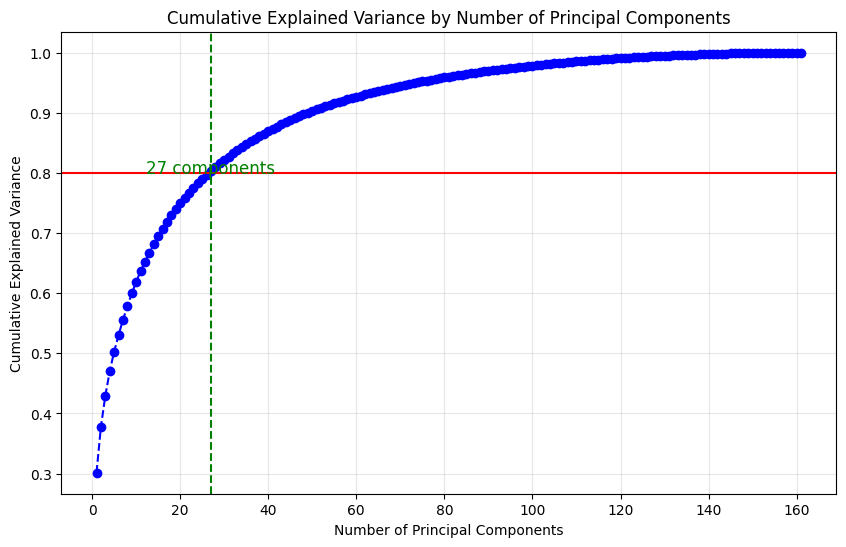

In [11]:
# Reviewing number of PCAs and their cummulative effect on the explained variance
pca = PCA()
pca.fit(cluster_dataset_standardized)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.8, color='r', linestyle='-')  # Horizontal line at 80%
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid(alpha=0.3)

# Find and mark the number of components for 80% variance
components_80 = np.argmax(cumulative_variance >= 0.8) + 1  # Index + 1 for the number of components
plt.axvline(x=components_80, color='g', linestyle='--')  # Vertical line at 80%
plt.text(components_80, 0.80, f'{components_80} components', color='g', fontsize=12, ha='center')

plt.show()

# 27 components is considerably high as those may introduce noice to the analysis

In [12]:
# Although cumulative explained variance increase with more principal components, I decided to go with 5
# as it provided a higher sillhoute score (better separation within clusters) and ease of explanation

# Create a PCA object
pca = PCA(n_components=5, random_state=1)

# Fit this to our data
pca_exercise = pca.fit_transform(cluster_dataset_standardized)



In [13]:
# Check the range of PCA scores again
min_pca_score = np.min(pca_exercise)
max_pca_score = np.max(pca_exercise)

print("Minimum PCA Score (Standardized):", min_pca_score)
print("Maximum PCA Score (Standardized):", max_pca_score)


Minimum PCA Score (Standardized): -22.661733498916192
Maximum PCA Score (Standardized): 137.28621699652814


In [14]:
# Add the first 5 PCA components to the data
pca_columns = [f'Z{i+1}' for i in range(5)]
pca_df = pd.DataFrame(pca_exercise, index=cluster_dataset_wo_missings.index, columns=pca_columns)
pca_df.head()

,Z1,Z2,Z3,Z4,Z5
50,-3.085467,-1.137990,1.360733,-3.277973,0.594757
51,-2.937062,-1.431751,1.637283,-3.240350,0.507560
80,6.365794,1.533757,-4.213050,3.731637,0.191732
81,7.744558,1.713724,-4.279722,3.247108,-0.451835
82,8.137534,2.297638,-4.451593,4.252896,0.487111


In [15]:
# Concatenate PCA components with the original dataset
data_with_pca = pd.concat([cluster_dataset_wo_missings, pca_df], axis=1)
data_with_pca.head()

,mean_price,band_a_council_tax,band_b_council_tax,band_c_council_tax,band_d_council_tax,band_e_council_tax,band_f_council_tax,band_g_council_tax,band_h_council_tax,all_properties_council_tax,...,num_girls_only_school_lsoa,num_boys_only_school_lsoa,num_religious_schools_school_lsoa,num_maintained_schools_school_lsoa,num_independent_schools_school_lsoa,Z1,Z2,Z3,Z4,Z5
50,71562.500,750.0,60.0,130.0,20.0,0.0,0.0,0.0,0.0,960.0,...,0.0,0.0,1.0,1.0,0.0,-3.085467,-1.137990,1.360733,-3.277973,0.594757
51,84187.500,750.0,60.0,130.0,20.0,0.0,0.0,0.0,0.0,960.0,...,0.0,0.0,1.0,1.0,0.0,-2.937062,-1.431751,1.637283,-3.240350,0.507560
80,252499.750,40.0,130.0,180.0,170.0,120.0,80.0,110.0,40.0,870.0,...,0.0,0.0,3.0,2.0,0.0,6.365794,1.533757,-4.213050,3.731637,0.191732
81,277343.625,40.0,130.0,180.0,170.0,140.0,90.0,110.0,40.0,890.0,...,0.0,0.0,2.0,2.0,0.0,7.744558,1.713724,-4.279722,3.247108,-0.451835
82,289037.500,40.0,130.0,180.0,170.0,150.0,110.0,120.0,40.0,920.0,...,0.0,0.0,3.0,2.0,0.0,8.137534,2.297638,-4.451593,4.252896,0.487111


In [16]:
# Combining these weights into a DataFrame for 5 components
pca_factor_weights = pd.DataFrame(
    pca.components_,
    columns=features
).transpose()

# Rename columns dynamically to reflect Z1 to Z5
pca_factor_weights.columns = [f'Z{i+1}' for i in range(pca.n_components_)]

# Visualizing the DataFrame
print(pca_factor_weights)

                                           Z1        Z2        Z3        Z4  \
mean_price                          -0.002619  0.089801 -0.143618  0.065674   
band_a_council_tax                  -0.027168 -0.007560  0.066014 -0.048332   
band_b_council_tax                  -0.012395 -0.004034  0.074046 -0.118148   
band_c_council_tax                  -0.009593  0.010193  0.028207 -0.065586   
band_d_council_tax                   0.012981  0.044507 -0.031875 -0.000338   
...                                       ...       ...       ...       ...   
num_girls_only_school_lsoa          -0.015671  0.029153 -0.026134 -0.002262   
num_boys_only_school_lsoa           -0.011139  0.023748 -0.023770  0.000632   
num_religious_schools_school_lsoa    0.019789  0.010947 -0.010611  0.022571   
num_maintained_schools_school_lsoa   0.031338  0.013032 -0.021465  0.050524   
num_independent_schools_school_lsoa -0.013843  0.041938 -0.053893  0.011179   

                                           Z5  
mea

The squared values of the individual PC factor loadings should sum to 1.

In [17]:
# Calculating the sum of the squared factor loadings
(pca_factor_weights**2).sum()

Z1    1.0
Z2    1.0
Z3    1.0
Z4    1.0
Z5    1.0
dtype: float64

The relative magnitude of these factor weights indicate which variables are most important for the individual principal components. The following code sorts these measures for the 5 PCs by their absolute values.

In [18]:
# Sorting the absolute values of factor weights for each principal component
for col in pca_factor_weights.columns:
    print(f"Top variables for {col}:")
    print(pca_factor_weights[col].sort_values(key=abs, ascending=False).head(10))
    print("\n")  # Separate outputs for readability


Top variables for Z1:
SSPT45n_tt_sec_schools        -0.124982
500EmpPT30n_tt_emp_centres    -0.123150
500EmpCyc30n_tt_emp_centres   -0.122775
500EmpCar15n_tt_emp_centres   -0.121748
SSPT60n_tt_sec_schools        -0.121556
5000EmpPTt_tt_emp_centres      0.121469
SSCyc30n_tt_sec_schools       -0.120740
100EmpCar15n_tt_emp_centres   -0.120162
100EmpCyc30n_tt_emp_centres   -0.119830
SSCyc45n_tt_sec_schools       -0.119751
Name: Z1, dtype: float64


Top variables for Z2:
HospPT45n_tt_hospitals          0.150642
HospCyc30n_tt_hospitals         0.150194
5000EmpPT30n_tt_emp_centres     0.147886
HospPT30n_tt_hospitals          0.147841
HospCyc45n_tt_hospitals         0.137931
5000EmpCyc15n_tt_emp_centres    0.137283
500EmpCar30n_tt_emp_centres    -0.136527
5000EmpCyc30n_tt_emp_centres    0.135405
100EmpCyc60n_tt_emp_centres    -0.134513
500EmpCar45n_tt_emp_centres    -0.132362
Name: Z2, dtype: float64


Top variables for Z3:
500EmpCar60n_tt_emp_centres     -0.223316
500EmpCar45n_tt_emp_centres 

In [19]:
# Report the marginal variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio (Top 5 PCs):")
print(explained_variance_ratio)

# Report the cumulative variance explained
cumulative_variance_ratio = explained_variance_ratio.cumsum()
print("\nCumulative Variance Ratio (Top 5 PCs):")
print(cumulative_variance_ratio)

Explained Variance Ratio (Top 5 PCs):
[0.30146221 0.07628393 0.05161434 0.04084756 0.03250968]

Cumulative Variance Ratio (Top 5 PCs):
[0.30146221 0.37774615 0.42936049 0.47020805 0.50271773]


In [20]:
# Concatenate along columns
data_with_pca = pd.concat([cluster_dataset_wo_missings, pca_df], axis=1)
data_with_pca.head()

,mean_price,band_a_council_tax,band_b_council_tax,band_c_council_tax,band_d_council_tax,band_e_council_tax,band_f_council_tax,band_g_council_tax,band_h_council_tax,all_properties_council_tax,...,num_girls_only_school_lsoa,num_boys_only_school_lsoa,num_religious_schools_school_lsoa,num_maintained_schools_school_lsoa,num_independent_schools_school_lsoa,Z1,Z2,Z3,Z4,Z5
50,71562.500,750.0,60.0,130.0,20.0,0.0,0.0,0.0,0.0,960.0,...,0.0,0.0,1.0,1.0,0.0,-3.085467,-1.137990,1.360733,-3.277973,0.594757
51,84187.500,750.0,60.0,130.0,20.0,0.0,0.0,0.0,0.0,960.0,...,0.0,0.0,1.0,1.0,0.0,-2.937062,-1.431751,1.637283,-3.240350,0.507560
80,252499.750,40.0,130.0,180.0,170.0,120.0,80.0,110.0,40.0,870.0,...,0.0,0.0,3.0,2.0,0.0,6.365794,1.533757,-4.213050,3.731637,0.191732
81,277343.625,40.0,130.0,180.0,170.0,140.0,90.0,110.0,40.0,890.0,...,0.0,0.0,2.0,2.0,0.0,7.744558,1.713724,-4.279722,3.247108,-0.451835
82,289037.500,40.0,130.0,180.0,170.0,150.0,110.0,120.0,40.0,920.0,...,0.0,0.0,3.0,2.0,0.0,8.137534,2.297638,-4.451593,4.252896,0.487111


c:\Bruno\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Bruno\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Bruno\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Bruno\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

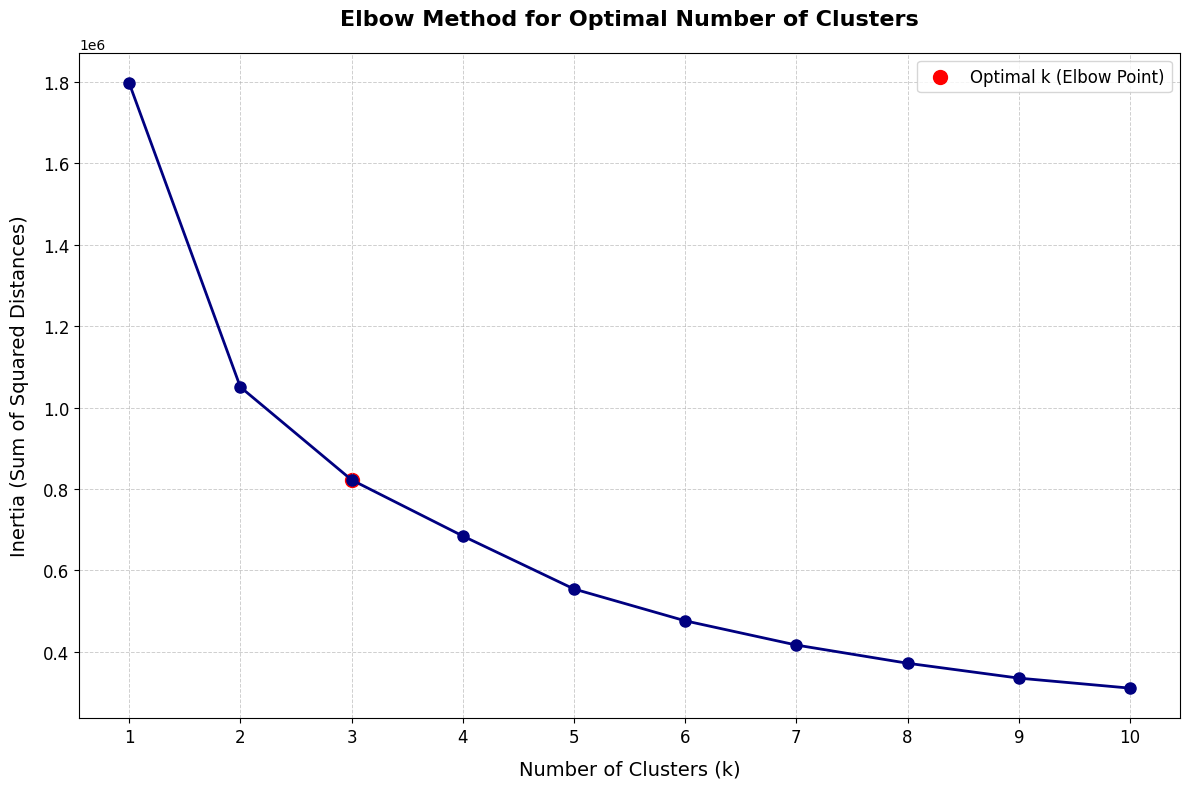

In [21]:
# Define the range of k values to test
k_values = range(1, 11)  # Testing k from 1 to 10
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_with_pca[pca_columns])
    inertia.append(kmeans.inertia_)

# Improved, publication-ready plot
plt.style.use('seaborn-muted')  # Set style for better aesthetics
plt.figure(figsize=(12, 8))
plt.plot(k_values, inertia, marker='o', linestyle='-', linewidth=2, markersize=8, color='navy')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Clusters (k)', fontsize=14, labelpad=10)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=14, labelpad=10)
plt.xticks(k_values, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.6, linestyle='--', linewidth=0.7)

# Highlight the "elbow" point for k=3 (if identified)
elbow_k = 3
plt.scatter(elbow_k, inertia[elbow_k - 1], color='red', s=100, label='Optimal k (Elbow Point)')
plt.legend(fontsize=12, loc='best')

plt.tight_layout()  # Adjust layout for publication-ready spacing
plt.show()

# The "elbow point" is the point where the rate of decrease in the inertia (within-cluster sum of squares) 
# slows down significantly, forming an "elbow" shape. In this graph, the most noticeable change in slope 
# occurs at 𝑘=3, indicating that adding more clusters beyond this point yields diminishing returns in terms of reducing inertia.

In [22]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data_with_pca[pca_columns])
data_with_pca['cluster'] = kmeans.labels_

# Analyze cluster composition
cluster_composition = data_with_pca.groupby(['cluster']).size()
print(cluster_composition)

c:\Bruno\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
0    10308
1     3211
2     8689
dtype: int64


In [23]:
# Calculate cluster composition in percentages
cluster_composition = data_with_pca.groupby(['cluster']).size()
cluster_composition_percentage = (cluster_composition / cluster_composition.sum()) * 100

# Display as percentages
print(cluster_composition_percentage)


cluster
0    46.415706
1    14.458754
2    39.125540
dtype: float64


In [225]:
# Validation with silhoutte score
silhouette_avg = silhouette_score(data_with_pca[pca_columns], kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3579097055201246


In [24]:
# Add the cluster labels to cluster_dataset_wo_missings
cluster_dataset_wo_missings['cluster'] = kmeans.labels_

# Check the updated dataset
cluster_dataset_wo_missings.head()

C:\Users\bruno\AppData\Local\Temp\ipykernel_21012\2552162720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_dataset_wo_missings['cluster'] = kmeans.labels_


,mean_price,band_a_council_tax,band_b_council_tax,band_c_council_tax,band_d_council_tax,band_e_council_tax,band_f_council_tax,band_g_council_tax,band_h_council_tax,all_properties_council_tax,...,avg_lower_age_school_lsoa,avg_upper_age_school_lsoa,range_age_school_lsoa,num_mixed_gender_school_lsoa,num_girls_only_school_lsoa,num_boys_only_school_lsoa,num_religious_schools_school_lsoa,num_maintained_schools_school_lsoa,num_independent_schools_school_lsoa,cluster
50,71562.500,750.0,60.0,130.0,20.0,0.0,0.0,0.0,0.0,960.0,...,11.000000,16.0,5.000000,1.0,0.0,0.0,1.0,1.0,0.0,0
51,84187.500,750.0,60.0,130.0,20.0,0.0,0.0,0.0,0.0,960.0,...,11.000000,16.0,5.000000,1.0,0.0,0.0,1.0,1.0,0.0,0
80,252499.750,40.0,130.0,180.0,170.0,120.0,80.0,110.0,40.0,870.0,...,3.333333,11.0,7.666667,3.0,0.0,0.0,3.0,2.0,0.0,1
81,277343.625,40.0,130.0,180.0,170.0,140.0,90.0,110.0,40.0,890.0,...,3.000000,11.0,8.000000,2.0,0.0,0.0,2.0,2.0,0.0,1
82,289037.500,40.0,130.0,180.0,170.0,150.0,110.0,120.0,40.0,920.0,...,3.333333,11.0,7.666667,3.0,0.0,0.0,3.0,2.0,0.0,1


In [25]:
def compare_cluster_means(dataset, variables, cluster_col='cluster'):
    """
    Compare the mean values of specified variables across clusters.
    
    Parameters:
        dataset (pd.DataFrame): The dataset containing the variables and cluster column.
        variables (list): List of variable names to compare.
        cluster_col (str): The name of the column containing cluster labels. Default is 'cluster'.
        
    Returns:
        pd.DataFrame: A dataframe showing the mean values of the selected variables across clusters.
    """
    # Check if the selected variables and cluster column exist in the dataset
    missing_vars = [var for var in variables if var not in dataset.columns]
    if missing_vars:
        raise ValueError(f"The following variables are not in the dataset: {missing_vars}")
    
    if cluster_col not in dataset.columns:
        raise ValueError(f"Cluster column '{cluster_col}' is not in the dataset.")
    
    # Group by cluster and calculate mean
    cluster_means = dataset.groupby(cluster_col)[variables].mean().transpose()
    
    # Add cluster labels to column names
    cluster_means.columns = [f'Cluster {c}' for c in cluster_means.columns]
    
    return cluster_means


In [34]:
# Select all numeric columns in the dataset
all_numeric_columns = cluster_dataset_wo_missings.select_dtypes(include=['float64', 'int64', "int32"]).columns.tolist()

# Apply the function to all numeric columns
cluster_means_df_all = compare_cluster_means(cluster_dataset_wo_missings, all_numeric_columns)

# Display the result
cluster_means_df_all


,Cluster 0,Cluster 1,Cluster 2
mean_price,285388.939444,330038.620030,282567.203327
band_a_council_tax,169.473225,73.132980,101.421337
band_b_council_tax,138.450718,107.835565,120.089769
band_c_council_tax,166.493015,147.175335,151.088733
band_d_council_tax,113.585565,138.981626,123.910692
...,...,...,...
num_boys_only_school_lsoa,0.042782,0.015571,0.016918
num_religious_schools_school_lsoa,1.205277,1.498287,1.287145
num_maintained_schools_school_lsoa,0.764358,1.194643,0.923582
num_independent_schools_school_lsoa,0.180248,0.106197,0.124295


In [35]:
import pandas as pd

# Step 1: List of council tax columns
council_tax_columns = [
    'band_a_council_tax', 'band_b_council_tax', 'band_c_council_tax',
    'band_d_council_tax', 'band_e_council_tax', 'band_f_council_tax',
    'band_g_council_tax', 'band_h_council_tax'
]

# Step 2: Group by 'cluster' and calculate total properties
grouped = cluster_dataset_wo_missings.groupby('cluster')

# Step 3: Compute sum of properties per council tax band and total properties
summed_data = grouped[council_tax_columns + ['all_properties_council_tax']].sum()

# Step 4: Calculate weighted average for each council tax band per cluster
for col in council_tax_columns:
    summed_data[f'{col}_weighted_avg'] = summed_data[col] / summed_data['all_properties_council_tax']

# Step 5: Keep only the weighted average columns for a clean summary
weighted_avg_df = summed_data[[f'{col}_weighted_avg' for col in council_tax_columns]].reset_index()

# Step 6: Display the final dataframe
weighted_avg_df

,cluster,band_a_council_tax_weighted_avg,band_b_council_tax_weighted_avg,band_c_council_tax_weighted_avg,band_d_council_tax_weighted_avg,band_e_council_tax_weighted_avg,band_f_council_tax_weighted_avg,band_g_council_tax_weighted_avg,band_h_council_tax_weighted_avg
0,0,0.233516,0.190770,0.229409,0.156509,0.092815,0.050946,0.042187,0.008607
1,1,0.091361,0.134713,0.183858,0.173622,0.163235,0.125952,0.114961,0.017441
2,2,0.140686,0.166582,0.209582,0.171882,0.135198,0.090457,0.079001,0.012818
